# Showcase: How to Dive Crime Data to Get Story of Crime Incident in New York City

In [37]:
from IPython.display import display, Image, HTML

## 1. Introduction

Crime analysis and detection has become a major attention in data mining area for a long time in a hope that it can help reducing crime rate in certain area. 
NYPD official website provides crime data of New York, you can download it from https://data.cityofnewyork.us/Public-Safety/NYPD-7-Major-Felony-Incident-Map/dvh8-u7es

#### Navigation:
Here, I first load data and then start to analyze data. I try to do statistical analysis via bar chart, year over year analysis and correlation analysis, then give a calendar heat map visualization; then I try to perform clustering techniques such as K-Means, DBSCAN, and also perform classification technique KNN to predict the crime category. 

## 2. Load Data

This data set consists of training and testing data which are all in CSV format. It is a quite large dataset since it contains crime data from year 1905, here for saving time, I just pick 2015 year data. Now I load data using pd.read_csv()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
data=pd.read_csv('NYcrimelocation.csv') #read data
data1=data[data.loc[:,'Occurrence Year']==2015] #subset row based on column value
data1.loc[:,'lng']=data1.loc[:,'Location 1'].str.split(',').str.get(1).str.rstrip(')') #slice coordinate (lat,lng) to lat,lng two columns
data1.loc[:,'lat']=data1.loc[:,'Location 1'].str.split(',').str.get(0).str.lstrip('(')
data1.lng=data1.lng.astype('float') #change series type
data1.lat=data1.lat.astype('float')
date=pd.to_datetime(data1.loc[:,'Occurrence Date'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Even there comes up with warnings, it's ok, no worry~

## 3. Statistical Analysis

Hear I would like to introduce Bar Chart, and correlation coefficient to perform statistical analysis.

###  3.1 Bar Chart: it displays of distribution of categorical variable, instead of continuous number, looks like following image:

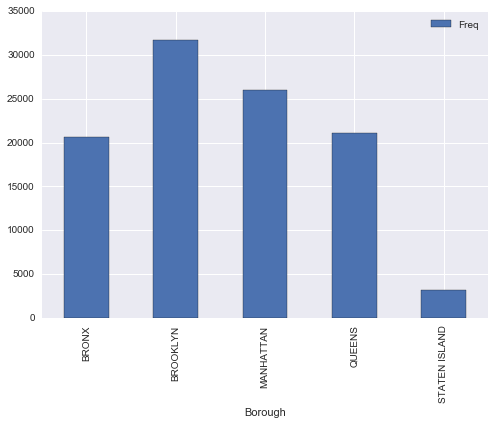

In [16]:
Image('borough.png')

It presents grouped data with rectangular bars with lengths proportional to the values that they represent. 

Here, data is grouped into five boroughs. The plot shows us Brooklyn has the highest frequency.

### 3.2 Correlation Analysis: here, we just analyze the replationship between borough and offense type

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
bo=data1['Borough'].tolist()
of=data1['Offense'].tolist()

In [21]:
le.fit(bo)
bo_label=le.transform(bo)

In [22]:
le.fit(of)
of_label=le.transform(of)

In [25]:
np.corrcoef([bo_label,of_label])

array([[ 1.        , -0.04041694],
       [-0.04041694,  1.        ]])

So, it gives us the conclusion there is little correlation between borough and offense type

## 4. Data Visualization

Here I would like to take two visualization type as example:  Calendar Heat Map and Choropleth Map. 
>Calendar Heatmap is an interesting alternative view of time-series data. The measured value is displayed as color mapped cells in a calendar. 

>Choropleth Map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map.

In this case, Calendar Heat Map takes takes two primary arguments: the first, day of week; second, time. I first calculated the count for each unique grouped time and day of week, then create frequency series, and color series by using count for each group of time and day of week. Choropleth Map takes precinct as area, I first calculated the count for each precinct, then add this count series to data set, then choropleth will use both geojson and dataframe to plot.

In [ ]:
from bokeh.plotting import *
from bokeh.models import HoverTool

days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
times=[i for i in range(24)]
times=list(map(str, times))
# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
max_count = time_day_g["freq"].max().astype(int)
day_of_week = []
time= []
color = []
frequencies = []
for t in times:
    for idx, day in enumerate(days):
        day_of_week.append(day)
        time.append(t)
        count = timedata.loc[t][idx] ## count for each unique grouped time and day
        frequencies.append(count)
        color.append("#%02x%02x%02x" % (0, 255 - int((count / max_count) * 255.0), 255 - 
                                        int((count / max_count) * 255.0)))
 
source = ColumnDataSource(
    data=dict(
        day_of_week=day_of_week,
        time=time,
        color=color,
        frequencies=frequencies,
    )
)

from collections import OrderedDict
#output_file('all-las-parties.html')
 
TOOLS = "hover"

p=figure(
    title='\"Analysis\" of Crime Incidence in NY', 
    x_range=times, 
    y_range=list(reversed(days)),
    tools=TOOLS)
p.plot_width=900
p.plot_height = 400
p.toolbar_location='left'

p.rect("time", "day_of_week", 1, 1, source=source, color=color, line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "20pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('frequencies', '@frequencies'),
])

show(p) 

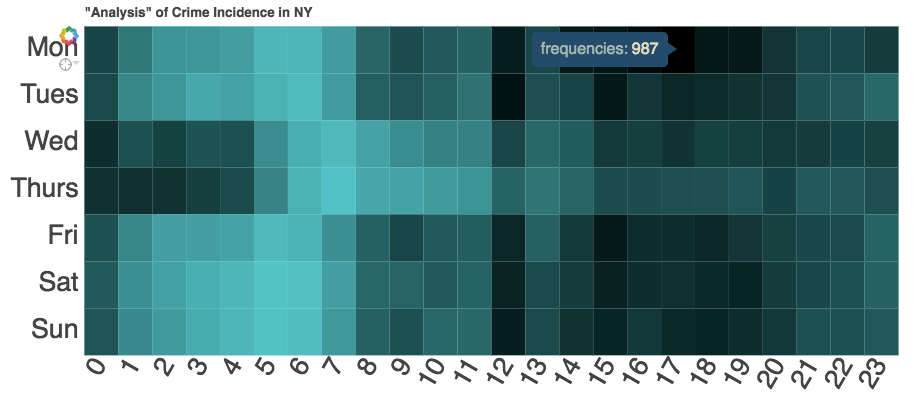

In [17]:
Image('p12.png')

Each cell in this picturs show the safety of each time in every day of week. The darker the color is, the less safety.
For examle, Monday 5pm is the most dangereous time because its color is the darkest.

This picture tells us 12pm, 12am, and 2pm to 8pm are the high crime frequency times, additionally, we also need to take high attention on Wednesday, and Thursday.

In [32]:
import folium
import json
NY_COORDINATES=[40.7128, -74.0059]

In [33]:
with open("ny3.geojson") as file: #first read the file and store it in an object
    data_ny = json.load(file)
data_ny1 = pd.read_json(json.dumps(data_ny["features"]), typ='frame')
data_ny1 = data_ny1.ix[:,1]
data_ny2 = pd.concat([pd.DataFrame.from_dict(item, orient='index').T for item in data_ny1])

In [34]:
map_1 = folium.Map(location=NY_COORDINATES, zoom_start=12)
map_1.choropleth(geo_path='ny3.geojson', data=data_ny2, columns=['precinct', 'crimedata_Number'],
                key_on='feature.properties.precinct',fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.
  app.launch_new_instance()


In [35]:
map_1

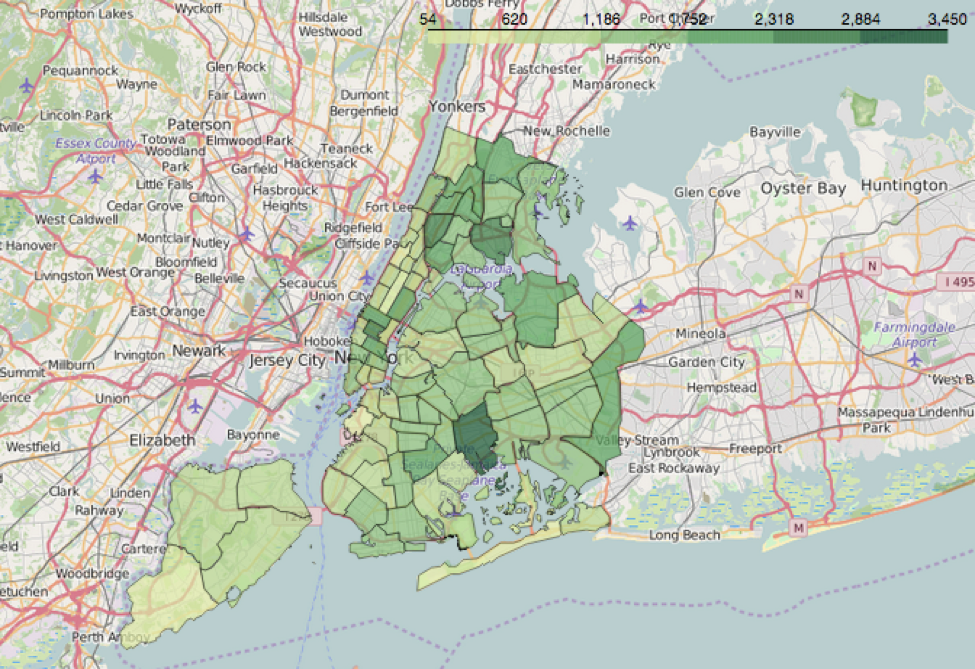

In [38]:
Image('choropleth.png')

The choropleth map shows the the most dangerous precinct is in Brooklyn borough.

## 5. Machine Learning

In [19]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split
import random
pd.options.display.mpl_style = 'default'

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
data1.head()

OBJECTID Identifier         Occurrence Date Day of Week  \
5439      5440.0   aae098f0  10/02/2015 12:11:00 PM      Monday   
17511    17512.0   d71bac4b  09/06/2015 02:00:00 AM   Wednesday   
17588    17589.0   ea9926ff  12/10/2015 04:45:00 PM      Sunday   
17625    17626.0   ae713901  12/01/2015 02:30:00 PM      Friday   
713630  713631.0   ab905411  02/13/2015 12:01:00 AM      Friday   

       Occurrence Month  Occurrence Day  Occurrence Year  Occurrence Hour  \
5439                Oct             2.0           2015.0             12.0   
17511               Sep             6.0           2015.0              2.0   
17588               Dec            10.0           2015.0             16.0   
17625               Dec             1.0           2015.0             14.0   
713630              Feb            13.0           2015.0              0.0   

        CompStat Month  CompStat Day    ...      Offense Classification  \
5439              11.0          23.0    ...                      FELONY   
17511             10.0           2.0    ...                      FELONY   
17588             12.0          10.0    ...                      FELONY   
17625             12.0           1.0    ...                      FELONY   
713630             5.0          22.0    ...                      FELONY   

       Sector Precinct    Borough         Jurisdiction XCoordinate  \
5439        B     25.0  MANHATTAN     N.Y. POLICE DEPT   1001575.0   
17511       G     90.0   BROOKLYN  N.Y. HOUSING POLICE    999983.0   
17588       C     18.0  MANHATTAN     N.Y. POLICE DEPT    991707.0   
17625       H     94.0   BROOKLYN     N.Y. POLICE DEPT    994636.0   
713630      B     67.0   BROOKLYN     N.Y. POLICE DEPT    998258.0   

       YCoordinate                             Location 1        lng  \
5439      232339.0  (40.8043840460001, -73.9374216689999) -73.937422   
17511     195658.0          (40.703707008, -73.943257966) -73.943258   
17588     216641.0      (40.7613110390001, -73.973083376) -73.973083   
17625     200707.0  (40.7175732060001, -73.9625349519999) -73.962535   
713630    176200.0       (40.65030209, -73.9495198819999) -73.949520   

              lat  
5439    40.804384  
17511   40.703707  
17588   40.761311  
17625   40.717573  
713630  40.650302  

[5 rows x 22 columns]

In [24]:
print(data1.columns)
print(data1.shape)

Index(['OBJECTID', 'Identifier', 'Occurrence Date', 'Day of Week',
       'Occurrence Month', 'Occurrence Day', 'Occurrence Year',
       'Occurrence Hour', 'CompStat Month', 'CompStat Day', 'CompStat Year',
       'Offense', 'Offense Classification', 'Sector', 'Precinct', 'Borough',
       'Jurisdiction', 'XCoordinate', 'YCoordinate', 'Location 1', 'lng',
       'lat'],
      dtype='object')
(102657, 22)


######  First, I split dataset into testing dataset and training dataset. 
To test machine learning algorithms what’s usually done is to have a training set of data and a separate dataset, called a test set. 

Initially the program is fed the training examples; this is when the machine learning takes place. Next, the test set is fed to the program. The target variable for each example from the test set isn’t given to the program, and the program decides which class each example should belong to.

##### Second, for simplifying procedure and focusing on the algorithm, I just choose lat and lng these two features

In [25]:
feature=data1[['lat','lng']]
Y=data1['Offense']

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, Y, test_size=0.33, random_state=42)

### 5.1 K-Means

K-means algorithm is one of the popular clustering method where the aim of this algorithm is to divide M points in N dimensions into K clusters so that the within-cluster sum of squares is minimize.

K-Means algorithm is simple and quite robust to handle large dataset. However, the implementation of this algorithm requires the attributes to be all numeric. You need take attention on the type of columns.

In k-means, defining the optimal number of clusters (k) is crucial. We usually look for the best number of k by using bend or elbow of Sum of Squared Error (SSE) plot.

SSE is the sum of the squared differences between each observation and its group's mean.

$SSE=\sum\limits_{i=1}^n{(x-\bar{x})^2}$

In [31]:
from sklearn.cluster import KMeans
kmcluster=KMeans()

In [32]:
kmcluster.fit(X_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [34]:
kmlabels=kmcluster.labels_

### 5.2 DBSCAN

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [37]:
from sklearn.cluster import DBSCAN
dbcluster=DBSCAN()

In [ ]:
#dbcluster.fit(X_train)## very heavy, not applicable for large dataset

### 5.3 KNN--K-Nearest Neighbors

It works like this: we have an existing set of example data, our training set. We have labels for all of this data—we know what class each piece of the data should fall into. When we’re given a new piece of data without a label, we compare that new piece of data to the existing data, every piece of existing data. We then take the most similar pieces of data (the nearest neighbors) and look at their labels. We look at the top k most similar pieces of data from our known dataset; this is where the k comes from. (k is an integer and it’s usually less than 20.) Lastly, we take a majority vote from the k most similar pieces of data, and the majority is the new class we assign to the data we were asked to classify.

In [27]:
from sklearn import neighbors
n_neighbors=4
weights='uniform'
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
knnclf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [30]:
print(knnclf.score(X_test,y_test))

0.395902824925


KNN's test score is about 0.40, which is kind of low.